In [1]:
import os
import six
import pydot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn import tree
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df_final = pd.read_csv('modelling_dataset_final.csv')
y=df_final.three_factor_transition

In [3]:
df_final = df_final.iloc[:,2:-5]

df_t_minus_3 = df_final.shift(3)
df_t_minus_3.columns = [str(col) + '_t-3' for col in df_t_minus_3.columns]

df_t_minus_2 = df_final.shift(2)
df_t_minus_2.columns = [str(col) + '_t-2' for col in df_t_minus_2.columns]

X = pd.concat([df_t_minus_3,df_t_minus_2], axis=1)
X = X.iloc[3:]
y = y.iloc[3:]
X.head()

,free_cash_flow_t-3,competitive_environment_t-3,strong_demand_bool_t-3,product_cycle_t-3,epidemic_t-3,higher_prices_bool_t-3,government_dissatisfaction_t-3,weak_strategy_bool_t-3,corporate_governance_t-3,management_t-3,...,equipment_failure_t-2,industry_neg_headwinds_t-2,management_defensiveness_t-2,industry_pos_general_t-2,finance_neg_revenue_down_t-2,industry_neg_demand_unstable_t-2,economy_neg_yield_curve_inverting_t-2,management_buzz_growth_t-2,industry_specific_ltip_drivers_t-2,industry_neg_margin_larger_t-2
3,24.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
5,16.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,24.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
7,0.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X.shape

(805, 618)

In [5]:
y.shape

(805,)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=168)

In [7]:
def show_result(y_test,predicted):
    '''show all results from the model, takes y_test and predicted Y value'''
    print(metrics.classification_report(y_test,predicted))
    print("Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, predicted)))
    print("confusion matrix: \n\n",metrics.confusion_matrix(y_test, predicted))

# define a function to plot ROC with auc
def plot_ROC(y_test,predicted_prob):
    '''plot ROC curve with auc, takes y_test and predicted probability for Y=1'''
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_prob)
    roc_auc = metrics.auc(fpr, tpr)
    # Plot the ROC curve
    plt.plot(fpr,tpr,'b',label = 'AUC = %.2f' %roc_auc)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc = 'lower right')
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0, 1]);plt.ylim([0, 1])
    plt.show()

              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82       200
         1.0       0.30      0.45      0.36        42

    accuracy                           0.72       242
   macro avg       0.58      0.61      0.59       242
weighted avg       0.77      0.72      0.74       242

Accuracy: 0.72
confusion matrix: 

 [[155  45]
 [ 23  19]]


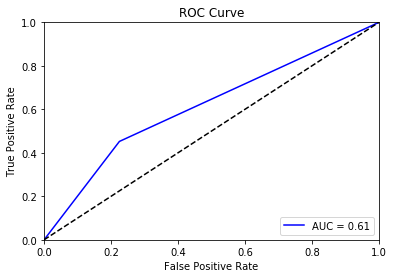

In [8]:
model = SVC(kernel = 'linear', C = 1)
model.fit(X_train, y_train) 
pred = model.predict(X_test)
predicted_prob = model.predict(X_test)

# Select probability where Y = 1
pred_prob = pd.Series(predicted_prob)

# Use pre-defined function to see model performance 
show_result(y_test,pred)
plot_ROC(y_test,pred_prob)